# IRIS Flower Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
iris = pd.read_csv('iris.csv')
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
iris.shape

(150, 6)

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualizing distribution of Features

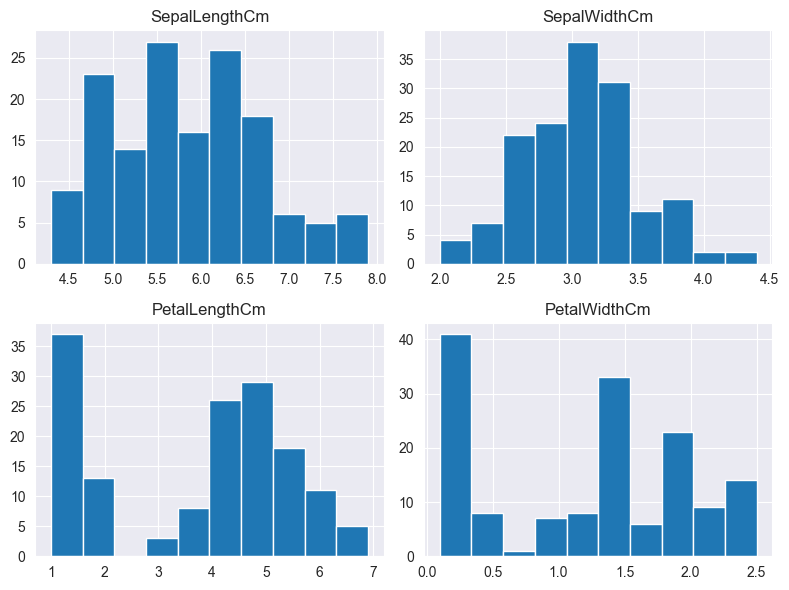

In [15]:
iris.drop(['Id'], axis=1,inplace=True)
iris.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

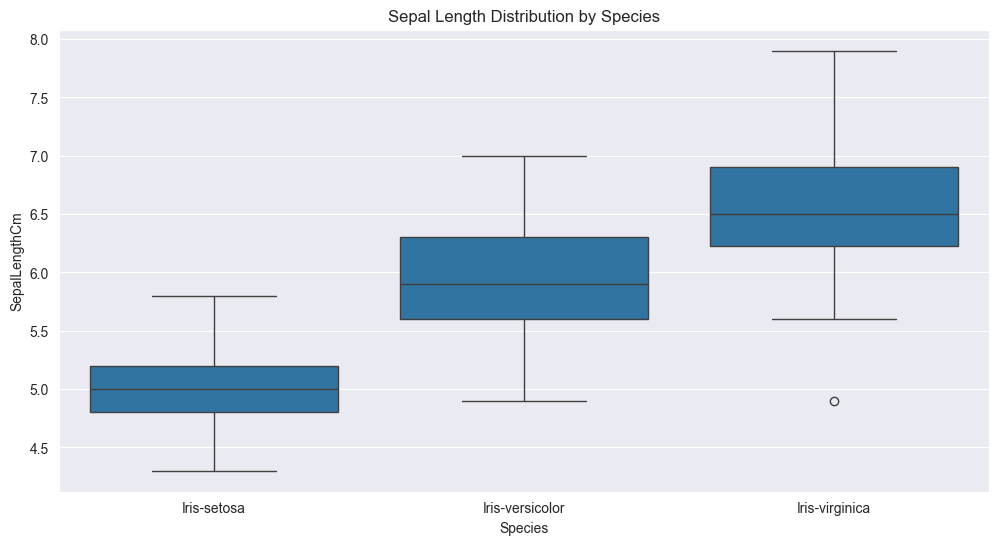

In [17]:
# Box plots for each feature by species
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='Species', y='SepalLengthCm')
plt.title('Sepal Length Distribution by Species')
plt.show()

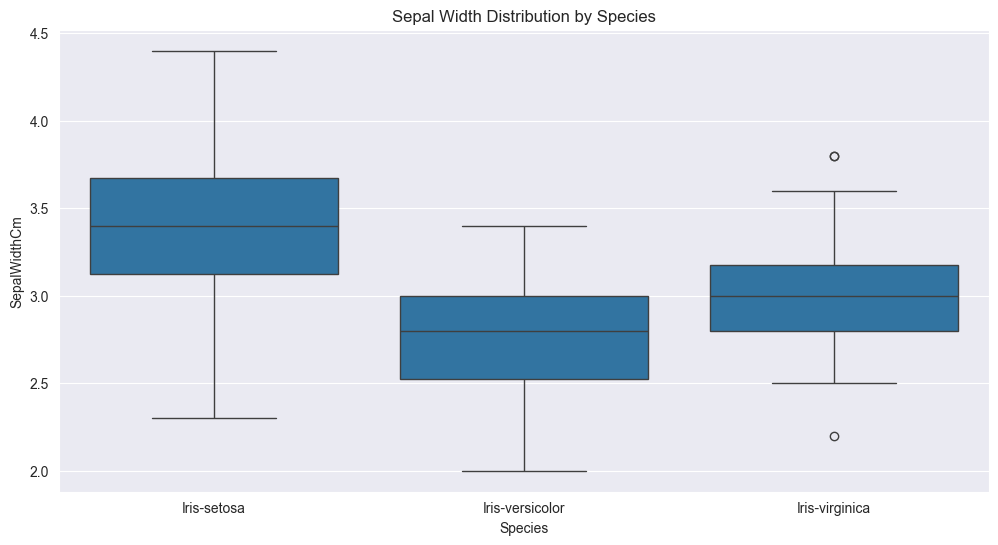

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='Species', y='SepalWidthCm')
plt.title('Sepal Width Distribution by Species')
plt.show()

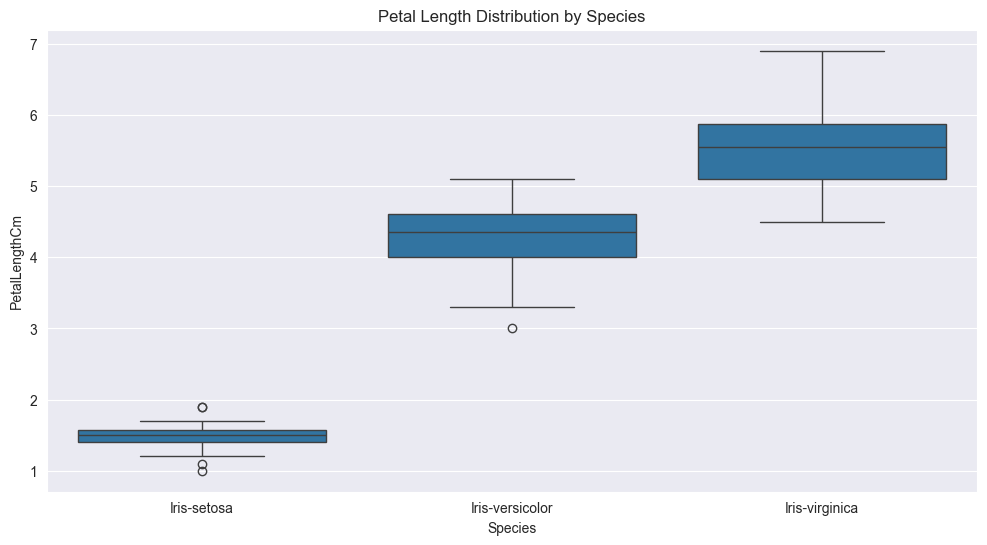

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='Species', y='PetalLengthCm')
plt.title('Petal Length Distribution by Species')
plt.show()

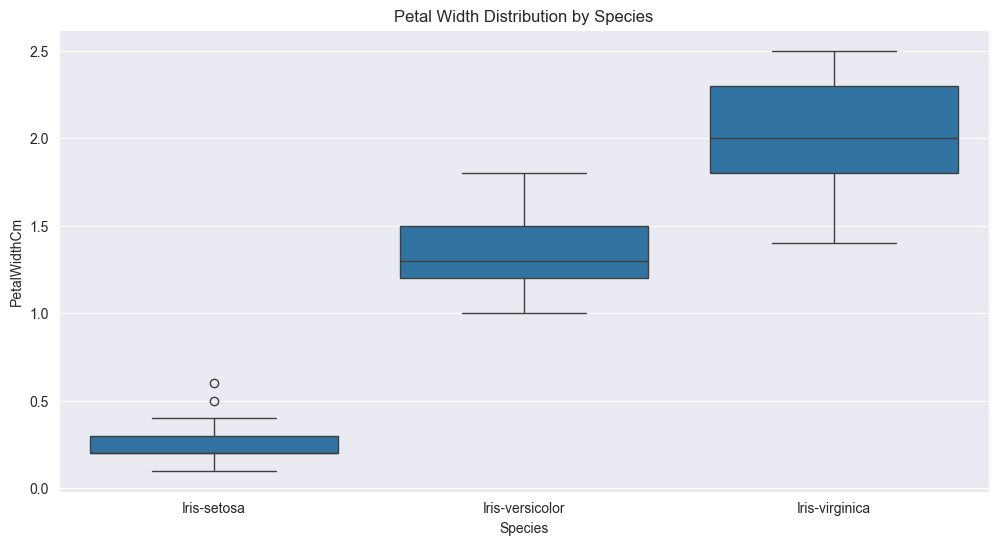

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x='Species', y='PetalWidthCm')
plt.title('Petal Width Distribution by Species')
plt.show()

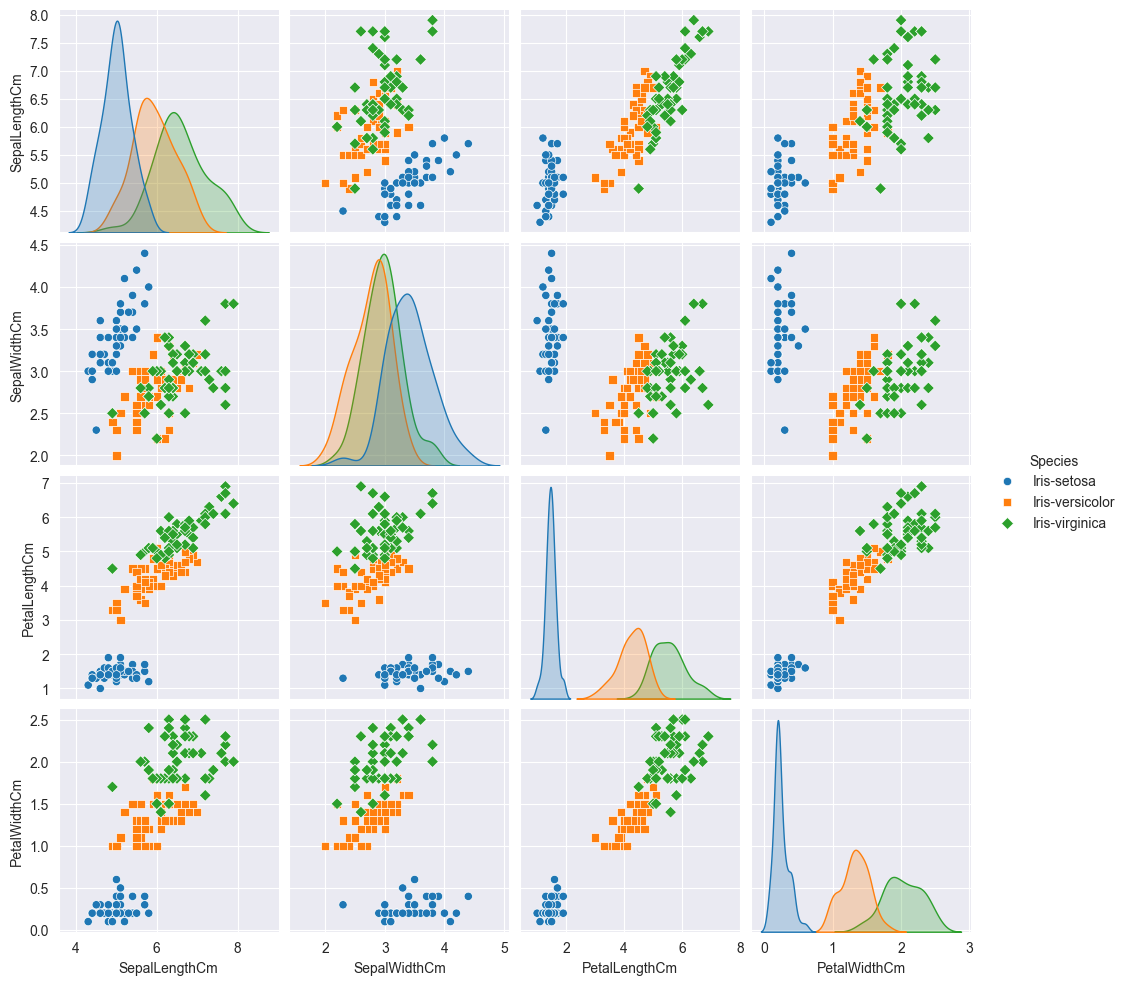

In [23]:
# how features correlate with each other and the target.

sns.pairplot(data=iris, hue='Species', markers=['o','s','D'])
plt.show()

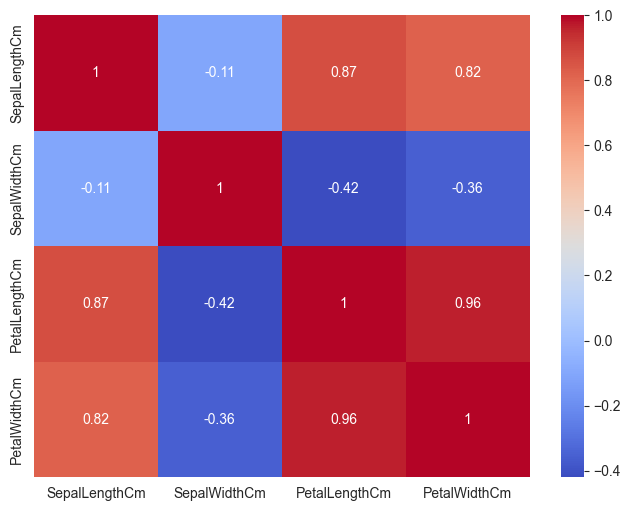

In [25]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()